# 제시되는 문제를 해결하시오.
**단, ######### Edit Here ######### 공간을 제외한 다른 셀이나 코드는 삭제하거나 수정해서는 안됩니다. (3, 4번 문제 제외)**

- 모든 코드에는 **주석**을 달아 코드의 목적과 파라미터를 설명하시오.


---------------------------------
### 1. 다음 조건에 맞는 프로그램을 작성하시오. (실행 결과 만족시 총 10점)
- 아래와 같은 함수 및 파이썬 코드를 정의하고 각 조건을 만족하는 classify 함수를 작성하시오. ( 단, array 는 numpy 모듈의 array 임)

In [10]:
import numpy as np
from numpy import array

def readDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

def readDataSet1():
    group = array([[1.0, 1.1, 1.0], [1.0, 1.0, 1.1], [0, 0, 0.1], [0, 0.1, 0]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

testSet = array([[0.1, 0.1], [0.1, 0.2], [0.9, 0.9], [0.9, 1.0]])
testSet1 = array([[0.1, 0.1, 0.1], [0.1, 0.2, 0.1], [0.9, 0.9, 0.9], [0.9, 1.0, 1.0]])

def classify(test, dataSet, label):
  ret = None
  ############ Edit Here ##################
  # test가 1차원(단일 샘플)인지 2차원(여러 샘플)인지 판단
  if test.ndim == 1:
      # 거리 계산
      diff = dataSet - test
      distances = np.sqrt(np.sum(diff ** 2, axis=1)) # 유클리드 공식
      min_index = np.argmin(distances) # 가장 가까운 이웃 찾기
      ret = label[min_index] # 가장 가까운 레이블
  else:
      # 여러 샘플일 경우 리스트에 담아서 반환
      ret = []
      for t in test:
        ret.append(classify(t, dataSet, label))
  #########################################
  return ret

In [11]:
dataSet, label = readDataSet()
classify(testSet[0], dataSet, label)

'B'

**결과값 ▶** B

In [12]:
dataSet, label = readDataSet1()
classify(testSet1[0], dataSet, label)

'B'

**결과값 ▶** B

In [13]:
dataSet, label = readDataSet1()
classify(testSet1, dataSet, label)

['B', 'B', 'A', 'A']

**결과값 ▶** ['B', 'B', 'A', 'A']

-------------------------------------
### 2. 다음 조건에 맞는 프로그램을 작성하시오.
기본기능 구현 : 30점
(파일 읽기 기능 : 5점, 단어 횟수 기능 : 10점, 중복 제거 기능: 10점, 정렬 기능 : 5점)
- ihaveadream.txt 파일을 입력으로 받아들인다.
- stopwords.txt 파일을 입력으로 받아들인다.
- ihaveadream.txt 파일을 공백문자를 기준으로 단어로 구분하고 구분된 단어는 영어문자로만 구성되게 전처리 한다.
- 구분된 단어들 중 stopwords.txt 의 단어들에 속하지 않는 단어들만의 등장 횟수를 계산한다
- 정리된 단어와 횟수를 쌍으로 많이 나온 단어 순으로 정렬하여 출력한다.

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
sortedList = []
############ Edit Here ##################
rootdir = '/content/drive/MyDrive/2025_SeSAC/ex/data/'

# stopwords 읽기
with open(rootdir + 'stopwords.txt', 'r') as f:
    # 각 줄에서 앞뒤 공백을 지우고 소문자로 변환, 빈 줄이 아니면 집합(set)에 넣어 저장
    stopwords = set(line.strip().lower() for line in f if line.strip())

# ihaveadream 읽기
with open(rootdir + 'ihaveadream.txt', 'r') as f:
    text = f.read()

# 소문자로 변환하고 공백 기준으로 단어 분리
raw_words = text.lower().split()

# 영어 알파벳만 남기기
words = []
for word in raw_words:
    # 알파벳만 남기고 나머지는 제거
    clean_word = ''
    for ch in word:
        if 'a' <= ch <= 'z':
            clean_word += ch
    if clean_word:  # 빈 문자열 제외
        words.append(clean_word)

# stopwords에 없는 단어만 남기기
filtered_words = []
for w in words:
    if w not in stopwords:
        filtered_words.append(w)

# 단어 빈도 세기
freq = {}
for w in filtered_words:
    if w in freq:
        freq[w] += 1
    else:
        freq[w] = 1

# (단어, 횟수) 쌍을 많이 나온 순으로 정렬
sortedList = sorted(freq.items(), key=lambda x: x[1], reverse=True)
#########################################
print(sortedList)

[('will', 27), ('freedom', 20), ('negro', 13), ('day', 12), ('ring', 12), ('dream', 11), ('nation', 10), ('today', 9), ('justice', 8), ('satisfied', 8), ('long', 6), ('men', 6), ('white', 6), ('years', 5), ('great', 5), ('free', 5), ('check', 5), ('america', 5), ('time', 5), ('children', 5), ('faith', 5), ('american', 4), ('hope', 4), ('land', 4), ('black', 4), ('mississippi', 4), ('mountain', 4), ('join', 3), ('stand', 3), ('injustice', 3), ('weve', 3), ('note', 3), ('rights', 3), ('people', 3), ('rise', 3), ('valley', 3), ('brotherhood', 3), ('gods', 3), ('sweltering', 3), ('alabama', 3), ('georgia', 3), ('state', 3), ('sing', 3), ('history', 2), ('slaves', 2), ('life', 2), ('segregation', 2), ('cash', 2), ('promissory', 2), ('liberty', 2), ('color', 2), ('insufficient', 2), ('funds', 2), ('refuse', 2), ('urgency', 2), ('racial', 2), ('negros', 2), ('content', 2), ('continue', 2), ('struggle', 2), ('dignity', 2), ('allow', 2), ('creative', 2), ('physical', 2), ('force', 2), ('brother

**▼ 결과값 ▼** <br>
[('will', 27), ('freedom', 20), ('negro', 13), ('day', 12), ('ring', 12), ('dream', 11), ('nation', 10), ('today', 9), ('justice', 8), ('satisfied', 8), ('long', 6), ('men', 6), ('white', 6), ('years', 5), ('great', 5), ('free', 5), ('check', 5), ('america', 5), ('time', 5), ('children', 5), ('faith', 5), ('american', 4), ('hope', 4), ('land', 4), ('black', 4), ('mississippi', 4), ('mountain', 4), ('join', 3), ('stand', 3), ('injustice', 3), ('weve', 3), ('note', 3), ('rights', 3), ('people', 3), ('rise', 3), ('valley', 3), ('brotherhood', 3), ('gods', 3), ('sweltering', 3), ('alabama', 3), ('georgia', 3), ('state', 3), ('sing', 3), ('history', 2), ('slaves', 2), ('life', 2), ('segregation', 2), ('cash', 2), ('promissory', 2), ('liberty', 2), ('color', 2), ('insufficient', 2), ('funds', 2), ('refuse', 2), ('urgency', 2), ('racial', 2), ('negros', 2), ('content', 2), ('continue', 2), ('struggle', 2), ('dignity', 2), ('allow', 2), ('creative', 2), ('physical', 2), ('force', 2), ('brothers', 2), ('realize', 2), ('destiny', 2), ('walk', 2), ('police', 2), ('brutality', 2), ('cities', 2), ('vote', 2), ('york', 2), ('mighty', 2), ('jail', 2), ('quest', 2), ('suffering', 2), ('work', 2), ('south', 2), ('knowing', 2), ('despair', 2), ('live', 2), ('true', 2), ('meaning', 2), ('sons', 2), ('heat', 2), ('boys', 2), ('girls', 2), ('hands', 2), ('hill', 2), ('places', 2), ('stone', 2), ('thee', 2), ('mountainside', 2), ('happy', 1), ('greatest', 1), ('demonstration', 1), ('score', 1), ('ago', 1), ('symbolic', 1), ('shadow', 1), ('signed', 1), ('emancipation', 1), ('proclamation', 1), ('momentous', 1), ('decree', 1), ('beacon', 1), ('light', 1), ('millions', 1), ('seared', 1), ('flames', 1), ('withering', 1), ('joyous', 1), ('daybreak', 1), ('night', 1), ('captivity', 1), ('sadly', 1), ('crippled', 1), ('manacles', 1), ('chains', 1), ('discrimination', 1), ('lives', 1), ('lonely', 1), ('island', 1), ('poverty', 1), ('midst', 1), ('vast', 1), ('ocean', 1), ('material', 1), ('prosperity', 1), ('languished', 1), ('corners', 1), ('society', 1), ('finds', 1), ('exile', 1), ('dramatize', 1), ('shameful', 1), ('condition', 1), ('sense', 1), ('nations', 1), ('capital', 1), ('architects', 1), ('republic', 1), ('wrote', 1), ('magnificent', 1), ('constitution', 1), ('declaration', 1), ('independence', 1), ('signing', 1), ('fall', 1), ('heir', 1), ('promise', 1), ('well', 1), ('guaranteed', 1), ('unalienable', 1), ('pursuit', 1), ('happiness', 1), ('obvious', 1), ('defaulted', 1), ('insofar', 1), ('citizens', 1), ('concerned', 1), ('honoring', 1), ('sacred', 1), ('obligation', 1), ('bad', 1), ('marked', 1), ('bank', 1), ('bankrupt', 1), ('vaults', 1), ('opportunity', 1), ('demand', 1), ('riches', 1), ('security', 1), ('hallowed', 1), ('spot', 1), ('remind', 1), ('fierce', 1), ('engage', 1), ('luxury', 1), ('cooling', 1), ('tranquilizing', 1), ('drug', 1), ('gradualism', 1), ('real', 1), ('promises', 1), ('democracy', 1), ('dark', 1), ('desolate', 1), ('sunlit', 1), ('path', 1), ('lift', 1), ('quicksands', 1), ('solid', 1), ('rock', 1), ('reality', 1), ('fatal', 1), ('overlook', 1), ('moment', 1), ('summer', 1), ('legitimate', 1), ('discontent', 1), ('pass', 1), ('invigorating', 1), ('autumn', 1), ('equality', 1), ('nineteen', 1), ('sixtythree', 1), ('needed', 1), ('blow', 1), ('steam', 1), ('rude', 1), ('awakening', 1), ('returns', 1), ('business', 1), ('usual', 1), ('rest', 1), ('tranquility', 1), ('granted', 1), ('citizenship', 1), ('whirlwinds', 1), ('revolt', 1), ('shake', 1), ('foundations', 1), ('bright', 1), ('emerges', 1), ('warm', 1), ('threshold', 1), ('leads', 1), ('palace', 1), ('process', 1), ('gaining', 1), ('rightful', 1), ('place', 1), ('guilty', 1), ('wrongful', 1), ('deeds', 1), ('seek', 1), ('satisfy', 1), ('thirst', 1), ('drinking', 1), ('cup', 1), ('bitterness', 1), ('hatred', 1), ('forever', 1), ('conduct', 1), ('high', 1), ('plane', 1), ('discipline', 1), ('protest', 1), ('degenerate', 1), ('violence', 1), ('majestic', 1), ('heights', 1), ('meeting', 1), ('soul', 1), ('marvelous', 1), ('militancy', 1), ('engulfed', 1), ('community', 1), ('lead', 1), ('distrust', 1), ('evidenced', 1), ('presence', 1), ('tied', 1), ('inextricably', 1), ('bound', 1), ('pledge', 1), ('march', 1), ('ahead', 1), ('turn', 1), ('devotees', 1), ('civil', 1), ('victim', 1), ('unspeakable', 1), ('horrors', 1), ('bodies', 1), ('heavy', 1), ('fatigue', 1), ('travel', 1), ('gain', 1), ('lodging', 1), ('motels', 1), ('highways', 1), ('hotels', 1), ('basic', 1), ('mobility', 1), ('smaller', 1), ('ghetto', 1), ('larger', 1), ('stripped', 1), ('selfhood', 1), ('robbed', 1), ('signs', 1), ('stating', 1), ('whites', 1), ('believes', 1), ('rolls', 1), ('waters', 1), ('righteousness', 1), ('stream', 1), ('unmindful', 1), ('trials', 1), ('tribulations', 1), ('fresh', 1), ('narrow', 1), ('cells', 1), ('areas', 1), ('left', 1), ('battered', 1), ('storms', 1), ('persecution', 1), ('staggered', 1), ('winds', 1), ('veterans', 1), ('unearned', 1), ('redemptive', 1), ('carolina', 1), ('louisiana', 1), ('slums', 1), ('ghettos', 1), ('northern', 1), ('situation', 1), ('changed', 1), ('wallow', 1), ('friends', 1), ('face', 1), ('difficulties', 1), ('tomorrow', 1), ('deeply', 1), ('rooted', 1), ('creed', 1), ('hold', 1), ('truths', 1), ('selfevident', 1), ('created', 1), ('equal', 1), ('red', 1), ('hills', 1), ('slave', 1), ('owners', 1), ('sit', 1), ('table', 1), ('oppression', 1), ('transformed', 1), ('oasis', 1), ('judged', 1), ('skin', 1), ('character', 1), ('vicious', 1), ('racists', 1), ('governor', 1), ('lips', 1), ('dripping', 1), ('interposition', 1), ('nullification', 1), ('sisters', 1), ('exalted', 1), ('low', 1), ('rough', 1), ('plain', 1), ('crooked', 1), ('straight', 1), ('glory', 1), ('lord', 1), ('revealed', 1), ('flesh', 1), ('hew', 1), ('transform', 1), ('jangling', 1), ('discords', 1), ('beautiful', 1), ('symphony', 1), ('pray', 1), ('country', 1), ('tis', 1), ('sweet', 1), ('fathers', 1), ('died', 1), ('pilgrims', 1), ('pride', 1), ('prodigious', 1), ('hilltops', 1), ('hampshire', 1), ('mountains', 1), ('heightening', 1), ('alleghenies', 1), ('pennsylvania', 1), ('snowcapped', 1), ('rockies', 1), ('colorado', 1), ('curvaceous', 1), ('slopes', 1), ('california', 1), ('lookout', 1), ('tennessee', 1), ('molehill', 1), ('village', 1), ('hamlet', 1), ('city', 1), ('speed', 1), ('jews', 1), ('gentiles', 1), ('protestants', 1), ('catholics', 1), ('spiritual', 1), ('god', 1), ('almighty', 1)]

------------------------------------
### 3. 피마 인디안 당뇨병 예측 (총 70점)
- diabetes.csv 파일을 입력으로 받아들인다. (10점)
  - Pregnancies: 임신 횟수
  - Glucose: 포도당 부하 검사 수치
  - BloodPressure: 혈압(mm Hg)
  - SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
  - Insulin: 혈청 인슐린(mu U/ml)
  - BMI: 체질량지수(체중(kg)/(키(m))^2)
  - DiabetesPedigreeFunction: 당뇨 내력 가중치 값
  - Age: 나이
  - Outcome: 클래스 결정 값(0또는 1)
- 각 속성(Outcome 제외)에 있는 0 값으나 null 값을 속성의 평균값으로 대체한다. (10점)
- EDA 를 한다. (20점)
- Outcome 을 예측하기 위한 아래 모델을 생성하여 적당한 파라미터를 찾고 accuracy 를 구한다. (30점)
  - 의사결정나무
  - SVM
  - KNN
- 아래의 셀들을 필요에 따라 생성하여 작성하시오

In [24]:
import pandas as pd

diabetes = pd.read_csv(rootdir+'diabetes.csv',sep=',')

In [25]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [28]:
# 각 속성(Outcome 제외)에 있는 0 값으나 null 값을 속성의 평균값으로 대체한다.

# Outcome을 제외한 컬럼 목록 추출
cols = diabetes.columns.drop('Outcome')

# 각 컬럼별로 0을 NaN으로 바꾸고 평균값으로 대체
for col in cols:
    diabetes[col] = diabetes[col].replace(0, np.nan) # 0을 NaN으로 변환
    mean_val = diabetes[col].mean() # NaN을 제외한 평균값 계산
    diabetes[col].fillna(mean_val, inplace=True) # NaN을 평균값으로 대체

/tmp/ipython-input-28-3924219471.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes[col].fillna(mean_val, inplace=True)             # NaN을 평균값으로 대체


In [29]:
# EDA 를 한다.
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,4.494673,2.975395,1.000,2.00000,4.494673,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [30]:
diabetes['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


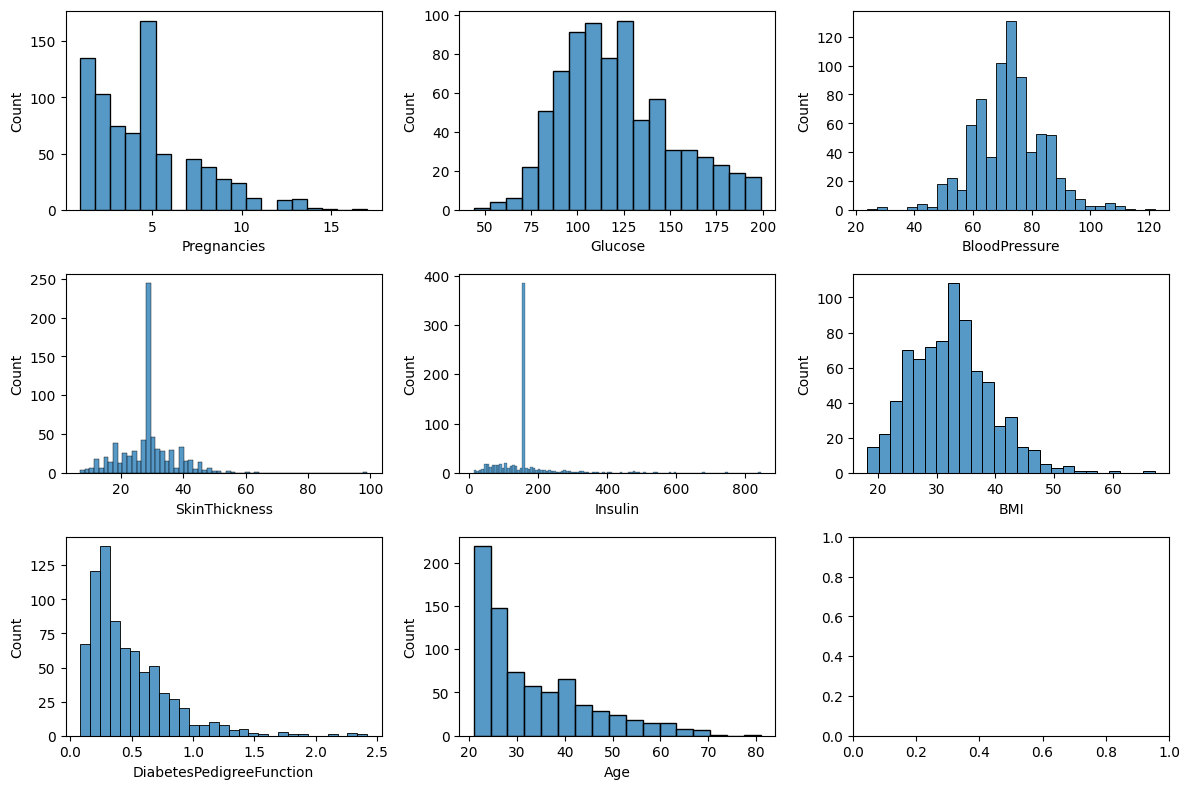

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 변수 분포 확인
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, column in enumerate(diabetes.columns[:-1]):
  sns.histplot(data=diabetes, x=column, ax=axes[i])

plt.tight_layout()
plt.show()

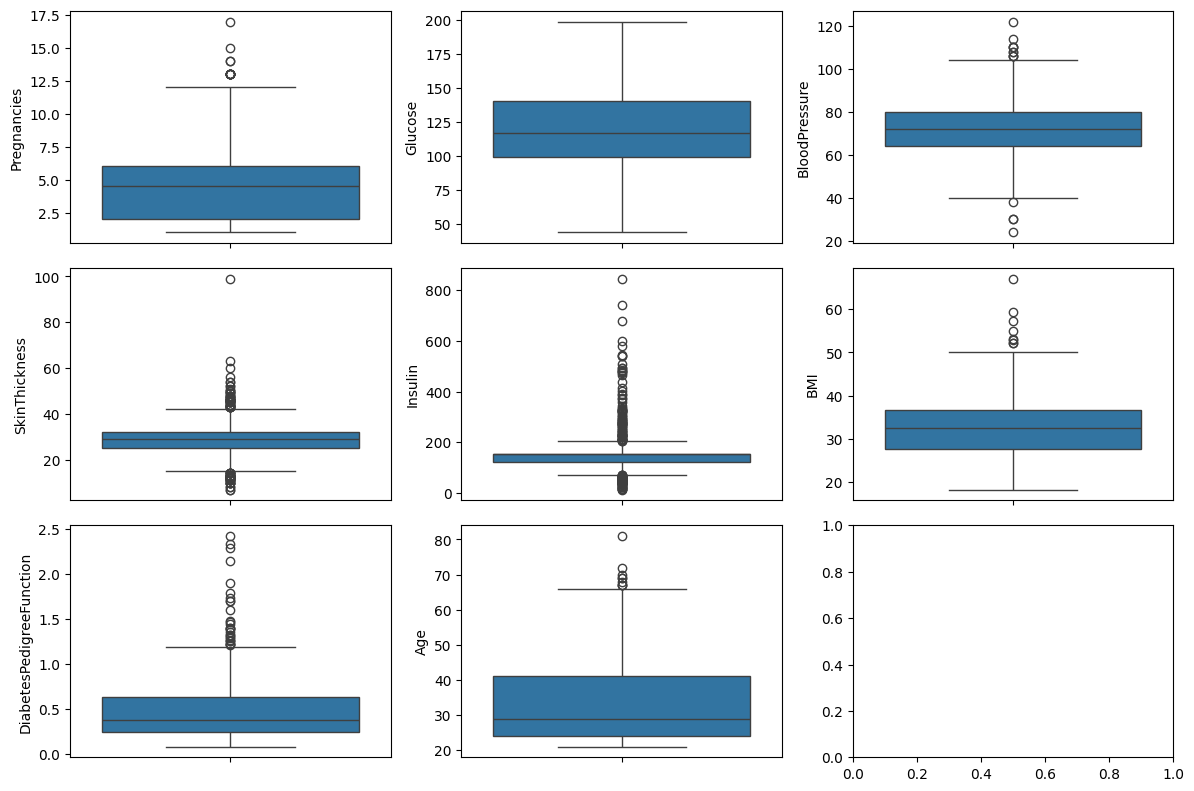

In [42]:
# 박스플롯으로 이상치 확인
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, column in enumerate(diabetes.columns[:-1]):
  sns.boxplot(data=diabetes, y=column, ax=axes[i])

plt.tight_layout()
plt.show()

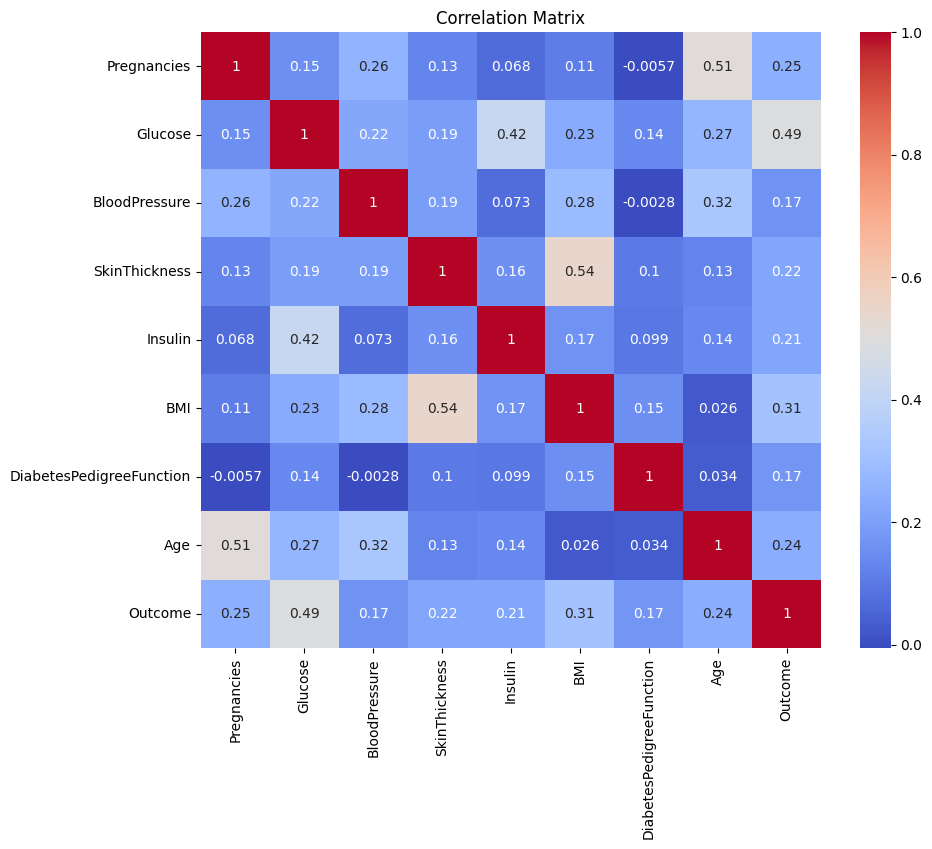

In [45]:
# 상관관계 분석
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Glucose 수치와 Outcome 사이에 가장 강한 양의 상관관계(0.49)가 나타났다.

- BMI와 Age도 Outcome과 양의 상관관계를 보인다.

- Age와 Pregnancies, SkinThickness와 BMI 사이에는 변수들 간 강한 양의 상관관계가 존재한다.

- DiabetesPedigreeFunction은 Outcome과 약한 상관관계를 가진다.

In [52]:
# Outcome 을 예측하기 위한 아래 모델을 생성하여 적당한 파라미터를 찾고 accuracy 를 구한다. (30점)
# 의사결정나무, SVM, KNN
from sklearn.model_selection import train_test_split

# 데이터 분할
X = diabetes.drop(columns='Outcome')
y = diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=7)
print(x_train.shape, y_test.shape)

(576, 8) (192,)


In [53]:
from sklearn.impute import SimpleImputer

# 결측치 처리
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# 파이프라인 정의
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', None)
])

# 의사결정나무, SVM, KNN만 포함한 파라미터 그리드
param_grid = [
    # 의사결정나무
    {
        'model': [DecisionTreeClassifier(random_state=7)],
        'model__max_depth': [3, 5, 7],
        'model__min_samples_split': [2, 5, 10]
    },
    # SVM
    {
        'model': [SVC(random_state=7)],
        'model__kernel': ['linear', 'rbf'],  # 커널 종류
        'model__C': [0.1, 1, 10],  # 규제 강도, 오차에 얼마나 민감하게 반응할지 결정
    },
    # KNN
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7, 9]
    }
]

# GridSearchCV 설정
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# 결과 출력
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy: {:.4f}".format(grid.best_score_))

# 테스트 성능 평가
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.4f}".format(test_accuracy))


Best Parameters: {'model': SVC(random_state=7), 'model__C': 1, 'model__kernel': 'linear'}
Best CV Accuracy: 0.7621
Test Accuracy: 0.7865


-------------------------
### 4. mnist 데이터를 classification 하는 CNN 모델과 RNN 모델을 구현하고 학습결과를 그래프로 나타내시오 (총 40점 - CNN 모델 20점, RNN 모델 20점)
- 딥러닝 모델의 레이어에 사용된 파라미터의 목적을 설명하시오

In [58]:
from tensorflow.keras.datasets import mnist

# 데이터 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


- CNN 모델 구현

In [59]:
np.min(x_train), np.max(x_train)

(np.uint8(0), np.uint8(255))

In [65]:
# 데이터 형태 변경 및 전처리 Min-Max 정규화
x_train_cnn = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
print(x_train_cnn.shape, x_test_cnn.shape, np.max(x_train_cnn))

(60000, 28, 28, 1) (10000, 28, 28, 1) 1.0


In [66]:
from tensorflow.keras.utils import to_categorical

# 원핫 인코딩
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

print(y_train_oh.shape, y_test_oh.shape)

(60000, 10) (10000, 10)


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten

# CNN 모델
model_cnn = Sequential()
model_cnn.add(Input(shape=(28, 28, 1))) # 입력 레이어 (가로 세로 채)
model_cnn.add(Conv2D(32, (3, 3), activation='relu')) # 합성곱 레이어 : Conv2D는 이미지 속 중요한 패턴과 특징을 찾음
model_cnn.add(MaxPooling2D((2, 2))) # 풀링 레이어 : 2*2 영역에서 최댓값 추출, 공간 정보 축소 및 연산량 감소
model_cnn.add(Conv2D(64, (3, 3), activation='relu')) # 64 더 많은 특징맵으로 복잡한 패턴 추출
model_cnn.add(MaxPooling2D((2, 2)))

model_cnn.add(Flatten()) # 평탄화
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(10, activation='softmax')) # 출력층

model_cnn.summary()

# 모델 컴파일 및 학습
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cnn = model_cnn.fit(x_train_cnn, y_train_oh,
             validation_data=(x_test_cnn, y_test_oh),
             epochs=5)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.9088 - loss: 0.2922 - val_accuracy: 0.9825 - val_loss: 0.0564
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9856 - loss: 0.0453 - val_accuracy: 0.9837 - val_loss: 0.0497
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9899 - loss: 0.0302 - val_accuracy: 0.9894 - val_loss: 0.0303
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9938 - loss: 0.0192 - val_accuracy: 0.9904 - val_loss: 0.0309
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9957 - loss: 0.0139 - val_accuracy: 0.9887 - val_loss: 0.0347


- RNN 모델 구현

In [68]:
from tensorflow.keras.datasets import mnist

# 데이터 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [69]:
# RNN용 데이터 형태 변경 및 Min-Max 정규화
x_train_rnn = x_train.reshape(-1, 28, 28).astype('float32') / 255.0
x_test_rnn = x_test.reshape(-1, 28, 28).astype('float32') / 255.0
print(x_train_rnn.shape, x_test_rnn.shape, np.max(x_train_rnn))

(60000, 28, 28) (10000, 28, 28) 1.0


In [70]:
# 원핫 인코딩
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)
print(y_train_oh.shape, y_test_oh.shape)

(60000, 10) (10000, 10)


In [71]:
from tensorflow.keras.layers import LSTM, Dense, Input

# RNN 모델 구성
model_rnn = Sequential()
model_rnn.add(Input(shape=(28, 28)))
model_rnn.add(LSTM(128, activation='tanh')) # 마지막 시점의 출력만 반환
model_rnn.add(Dense(10, activation='softmax')) # Dense를 통해 shape 맞춤

model_rnn.summary()

# 모델 컴파일 및 학습
model_rnn.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

history_rnn = model_rnn.fit(x_train_rnn, y_train_oh,
                           validation_data=(x_test_rnn, y_test_oh),
                           epochs=5)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        80,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,674 (319.04 KB)

 Trainable params: 81,674 (319.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.7798 - loss: 0.6541 - val_accuracy: 0.9621 - val_loss: 0.1263
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 48ms/step - accuracy: 0.9667 - loss: 0.1118 - val_accuracy: 0.9713 - val_loss: 0.0952
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 135s 44ms/step - accuracy: 0.9778 - loss: 0.0749 - val_accuracy: 0.9783 - val_loss: 0.0694
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 45ms/step - accuracy: 0.9823 - loss: 0.0588 - val_accuracy: 0.9754 - val_loss: 0.0784
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 44ms/step - accuracy: 0.9863 - loss: 0.0452 - val_accuracy: 0.9821 - val_loss: 0.0551


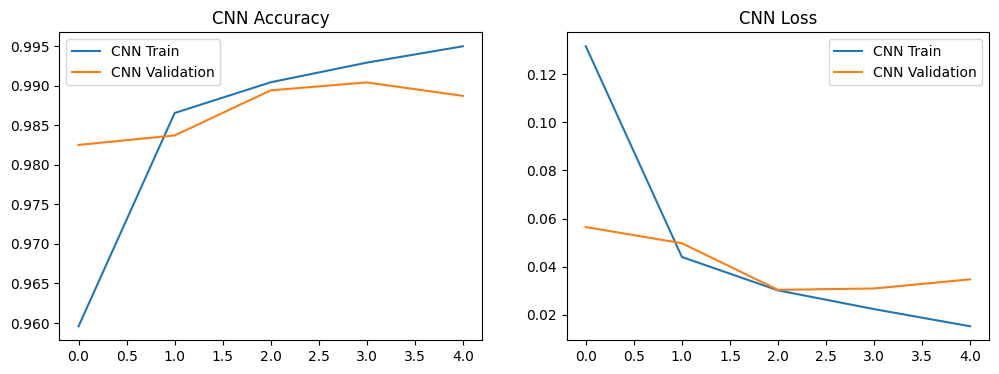

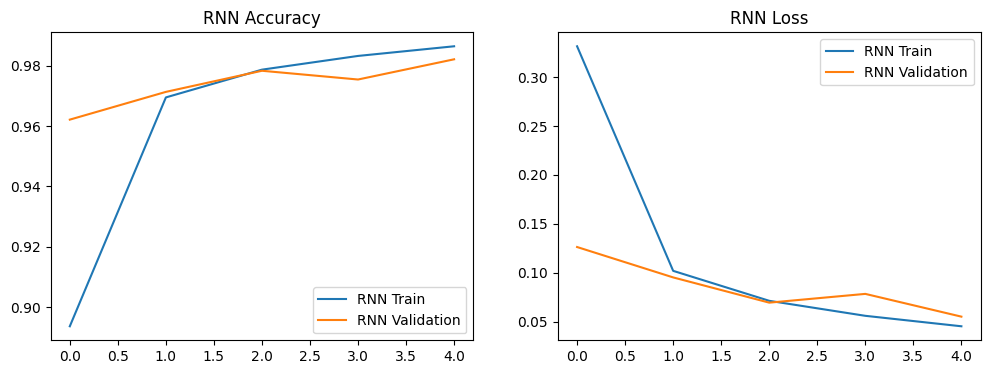

In [76]:
# 그래프 그리기
import matplotlib.pyplot as plt

# # CNN 학습 결과 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='CNN Train')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation')
plt.title('CNN Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='CNN Train')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation')
plt.title('CNN Loss')
plt.legend()
plt.show()

# RNN 학습 결과 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='RNN Train')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validation')
plt.title('RNN Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='RNN Train')
plt.plot(history_rnn.history['val_loss'], label='RNN Validation')
plt.title('RNN Loss')
plt.legend()
plt.show()
